In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from plot_utils import *

2025-01-29 13:36:32.554886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-29 13:36:32.563751: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-29 13:36:32.566427: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-29 13:36:33.019857: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Max test accuracy of Standard is 0% with sqrt(lr) 1
Max test accuracy of norm is 85.87% with param 0.15
Max test accuracy of gcstdu is 86.02% with param 0.15
Max test accuracy of wd is 82.83% with lambda 0.002


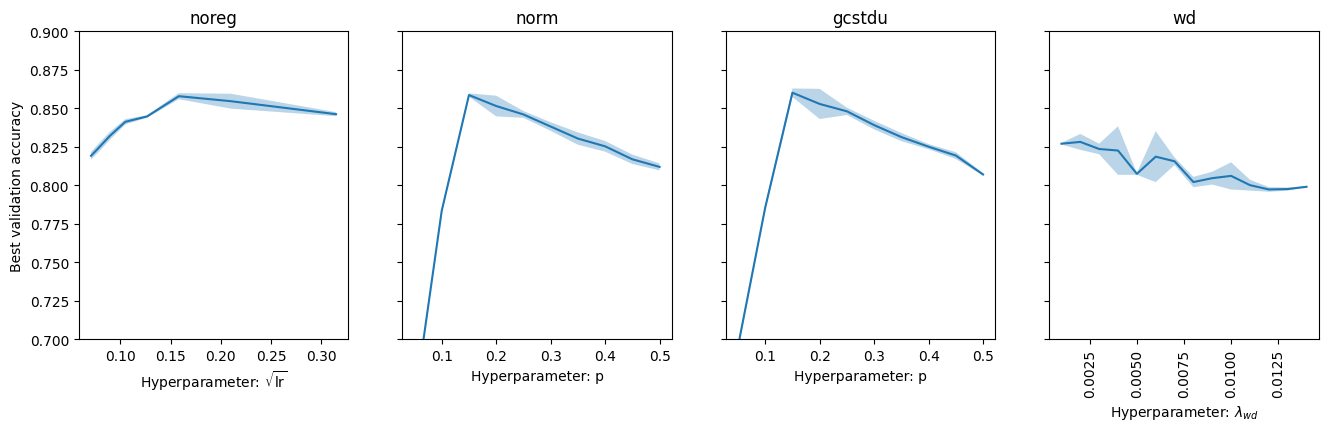

In [4]:
fig,axs = plt.subplots(ncols=4,nrows=1,sharey="row")
fig.set_size_inches(16,4)
axs[0].set_ylim(0.7,0.9) 

x,y,_ = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/standard"),
                               lambda subpath: np.sqrt(float(subpath)),lambda p : max_acc(get_stats(p,"test_stats")),axs[0], norm=False)
axs[0].set_title("noreg")
axs[0].set_ylabel("Best validation accuracy")
axs[0].set_xlabel(r"Hyperparameter: $\sqrt{\text{lr}}$")
print(f"Max test accuracy of Standard is {0}% with sqrt(lr) {1}".format(round(100*y.max(),2),round(x[y.argmax()]**2,5)))

x,y,_ = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/norm",skip=lambda s : s.endswith("0")),
                               lambda subpath: float(subpath.split("_")[0]),lambda p : max_acc(get_stats(p,"test_stats")), axs[1], norm=False)
axs[1].set_title("norm")
#axs[1].set_ylabel("Max. test accuracy")
axs[1].set_xlabel("Hyperparameter: p")
print("Max test accuracy of norm is {0}% with param {1}".format(round(100*y.max(),2),round(x[y.argmax()],5)))

x,y,_ = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/gcstdu"),
                               lambda subpath: float(subpath.split("_")[0]),lambda p : max_acc(get_stats(p,"test_stats")), axs[2], norm=False)
axs[2].set_title("gcstdu")
#axs[2].set_ylabel("Max. test accuracy")
axs[2].set_xlabel("Hyperparameter: p")
print("Max test accuracy of gcstdu is {0}% with param {1}".format(round(100*y.max(),2),round(x[y.argmax()],5)))

x,y,_ = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/wd"),
                               lambda subpath: float(subpath),lambda p : max_acc(get_stats(p,"test_stats")), axs[3], norm=False)
axs[3].set_title("wd")
#axs[3].set_ylabel("Max. test accuracy")
axs[3].set_xlabel(r"Hyperparameter: $\lambda_{wd}$")
axs[3].tick_params(axis='x', labelrotation=90)
print("Max test accuracy of wd is {0}% with lambda {1}".format(round(100*y.max(),2),round(x[y.argmax()],5)))

fig.savefig("../images/sgdm/noreg_norm_gcstdu_wd_hyperparameter_best_accuracy.png", bbox_inches='tight')


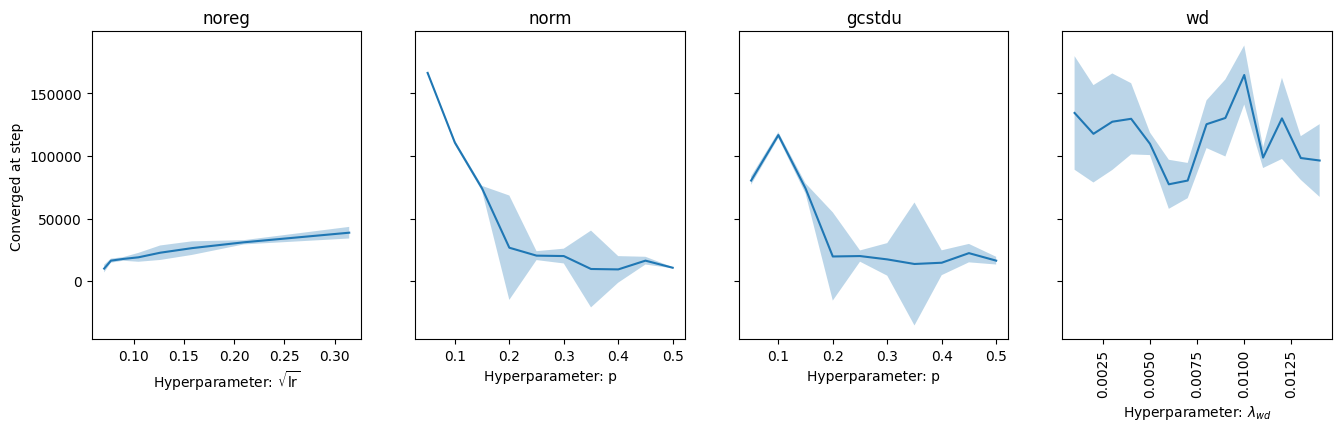

In [5]:
fig,axs = plt.subplots(ncols=4,nrows=1,sharey="row")
fig.set_size_inches(16,4)

x,y,_ = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/standard"),
                               lambda subpath: np.sqrt(float(subpath)),lambda p : estimate_convergence(get_stats(p,"test_stats")["acc"])[0],axs[0], norm=False)
axs[0].set_title("noreg")
axs[0].set_ylabel("Converged at step")
axs[0].set_xlabel(r"Hyperparameter: $\sqrt{\text{lr}}$")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/norm",skip=lambda s : s.endswith("0")),
                               lambda subpath: float(subpath.split("_")[0]),lambda p : estimate_convergence(get_stats(p,"test_stats")["acc"])[0], axs[1], norm=False)
axs[1].set_title("norm")
axs[1].set_xlabel("Hyperparameter: p")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/gcstdu"),
                               lambda subpath: float(subpath.split("_")[0]),lambda p : estimate_convergence(get_stats(p,"test_stats")["acc"])[0], axs[2], norm=False)
axs[2].set_title("gcstdu")
axs[2].set_xlabel("Hyperparameter: p")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/wd"),
                               lambda subpath: float(subpath),lambda p : estimate_convergence(get_stats(p,"test_stats")["acc"])[0], axs[3], norm=False)
axs[3].set_title("wd")
axs[3].set_xlabel(r"Hyperparameter: $\lambda_{wd}$")
axs[3].tick_params(axis='x', labelrotation=90)


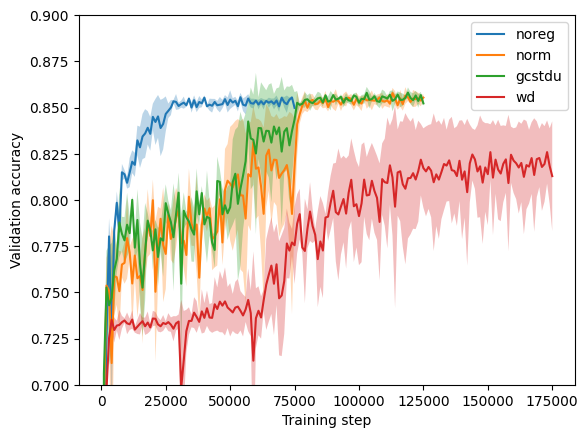

In [7]:
stats = get_stats("../exps_sgdm/standard/0.025","test_stats")
plot_step_stat(stats["acc"],plt,label="noreg")

stats = get_stats("../exps_sgdm/norm/0.15_1","test_stats")
plot_step_stat(stats["acc"],plt,label="norm")

stats = get_stats("../exps_sgdm/gcstdu/0.15_1","test_stats")
plot_step_stat(stats["acc"],plt,label="gcstdu")

stats = get_stats("../exps_sgdm/wd/0.002","test_stats")
plot_step_stat(stats["acc"],plt,label="wd")

plt.legend() 
ax = plt.gca()
ax.set_ylim(0.7,0.9) 
ax.set_xlabel("Training step")
ax.set_ylabel("Validation accuracy")
plt.savefig("../images/sgdm/noreg_norm_gcstdu_wd_best_hyperparameter_accuracy.png", bbox_inches='tight')

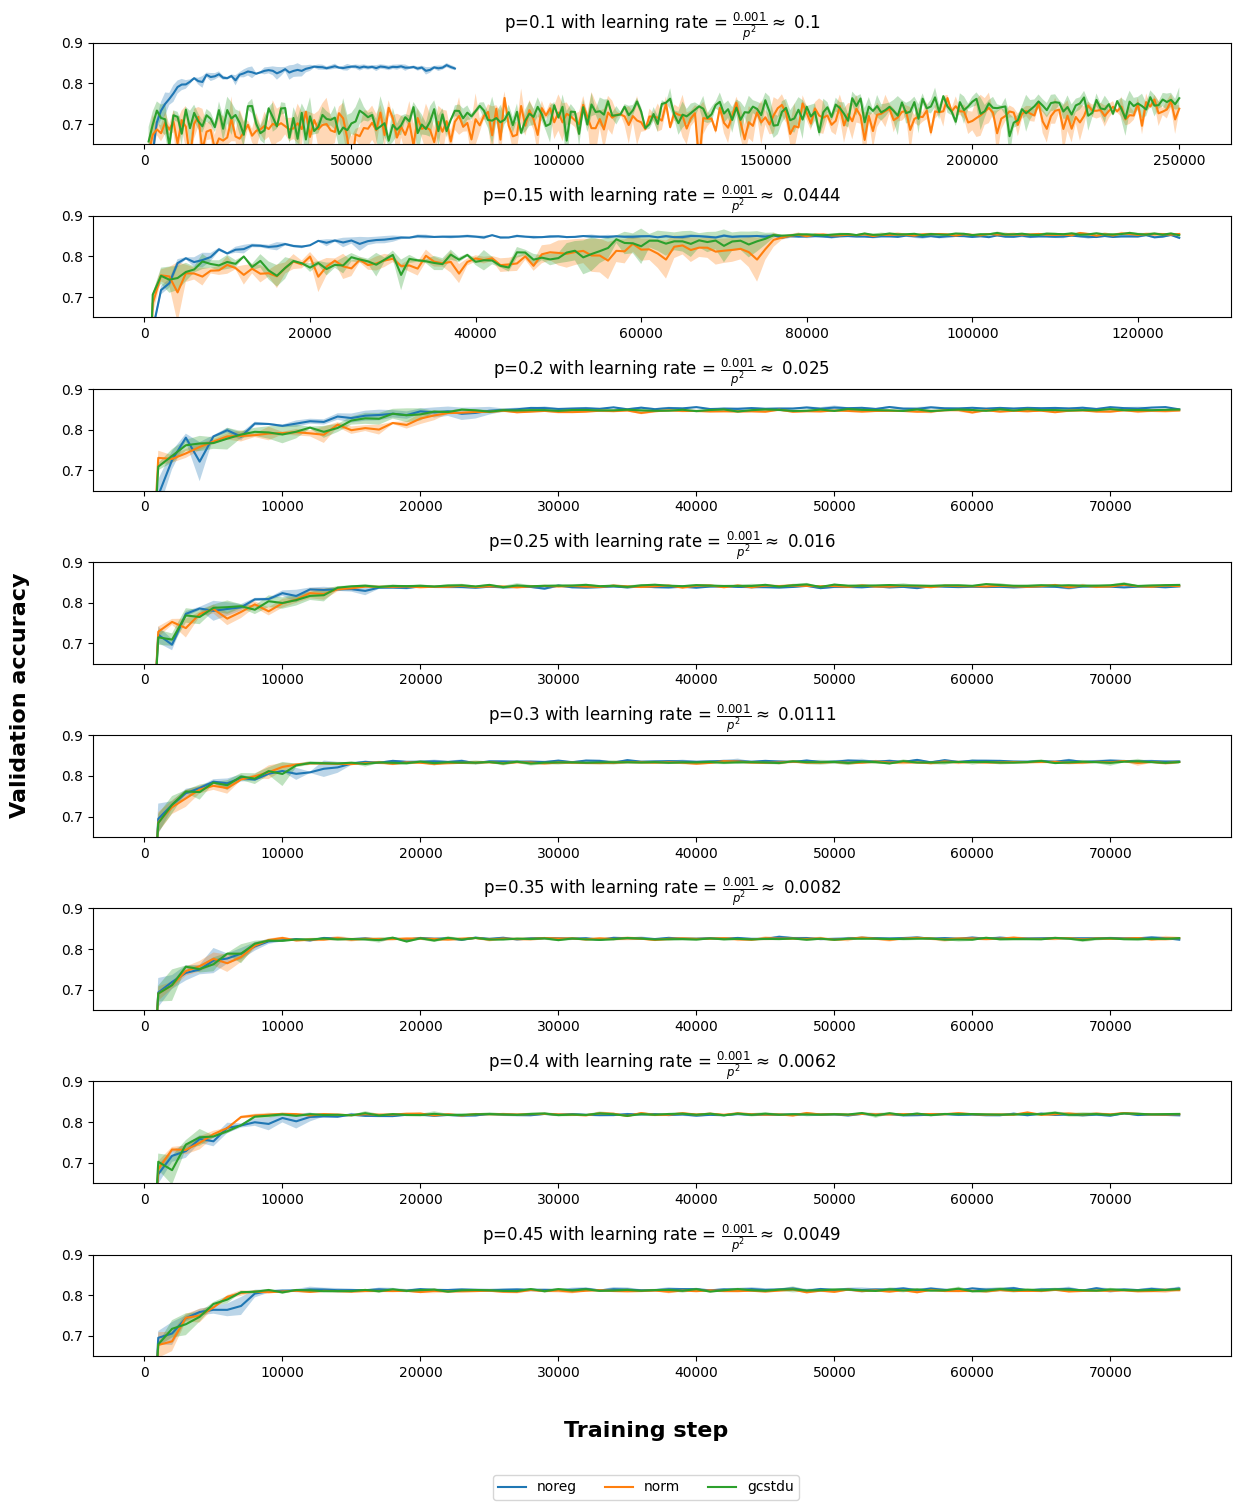

In [8]:
lrc = [("0.099","0.1"),("0.044","0.15"),("0.025","0.2"),("0.016","0.25"),("0.011","0.3"),("0.008","0.35"),("0.006","0.4"),("0.005","0.45")]

fig,axs = plt.subplots(ncols=1,nrows=len(lrc),sharey="all")

for (lr,c),ax in zip(lrc,axs):
    stats = get_stats("../exps_sgdm/standard/{0}".format(lr),"test_stats")
    plot_step_stat(stats["acc"],ax,label="noreg")

    stats = get_stats("../exps_sgdm/norm/{0}_1".format(c),"test_stats")
    plot_step_stat(stats["acc"],ax,label="norm")

    stats = get_stats("../exps_sgdm/gcstdu/{0}_1".format(c),"test_stats")
    plot_step_stat(stats["acc"],ax,label="gcstdu")

    ax.set_title(fr"p={c} with learning rate = $\frac{{0.001}}{{p^2}} \approx$ {round(0.001/(float(c)**2),4)}")
    ax.set_ylim(0.65,0.9) 


fig.text(0.5, -0.03, "Training step", ha='center', font={'size'   : 16,'weight' : 'bold'})
fig.text(-0.03, 0.5, "Validation accuracy", va='center', rotation='vertical',font={'size'   : 16,'weight' : 'bold'})

lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.set_size_inches(12,14)
fig.tight_layout()
fig.savefig("../images/sgdm/noreg_norm_gcstdu_accuracy.png", bbox_inches='tight',dpi=300)

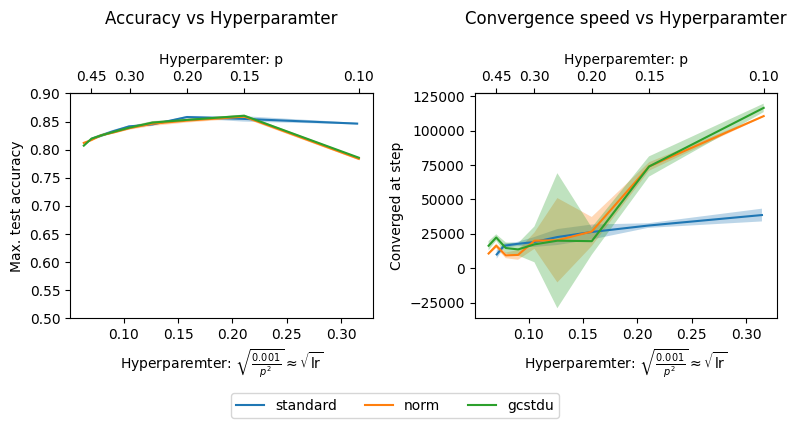

In [110]:
fig,axs = plt.subplots(ncols=2,nrows=1)
fig.set_size_inches(8,4)


x,y,_ = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/standard"),
                               lambda subpath: np.sqrt(float(subpath)),lambda p : max_acc(get_stats(p,"test_stats")), axs[0], norm=False,label="standard")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/norm",skip=lambda s : s.endswith("0") or float(s.split("_")[0]) < 0.1),
                               lambda subpath: np.sqrt(0.001/(float(subpath.split("_")[0]))**2),lambda p : max_acc(get_stats(p,"test_stats")), axs[0], norm=False,label="norm")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/gcstdu",skip=lambda s : float(s.split("_")[0]) < 0.1),
                               lambda subpath: np.sqrt(0.001/(float(subpath.split("_")[0]))**2),lambda p : max_acc(get_stats(p,"test_stats")), axs[0], norm=False,label="gcstdu")

axs[0].set_xlabel(r"Hyperparemter: $\sqrt{\frac{0.001}{p^2}} \approx \sqrt{\text{lr}}$")
axs[0].set_ylim(0.5,0.9) 
axs[0].set_ylabel("Max. test accuracy")
axs[0].set_title("Accuracy vs Hyperparamter",pad=50)

x,y,_ = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/standard"),
                               lambda subpath: np.sqrt(float(subpath)),lambda p : estimate_convergence(get_stats(p,"test_stats")["acc"])[0], axs[1], norm=False,label="standard")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/norm",skip=lambda s : s.endswith("0") or float(s.split("_")[0]) < 0.1),
                               lambda subpath: np.sqrt(0.001/((float(subpath.split("_")[0]))**2)),lambda p : estimate_convergence(get_stats(p,"test_stats")["acc"])[0], axs[1], norm=False,label="norm")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/gcstdu",skip=lambda s : float(s.split("_")[0]) < 0.1),
                               lambda subpath: np.sqrt(0.001/((float(subpath.split("_")[0]))**2)),lambda p : estimate_convergence(get_stats(p,"test_stats")["acc"])[0], axs[1], norm=False,label="gcstdu")


secx = axs[0].secondary_xaxis('top', functions=(lambda x: np.sqrt(0.001/(x**2+1e-7)), lambda x: np.sqrt(0.001/(x**2+1e-7))))
secx.set_ticks([0.1,0.15,0.2,0.3,0.45])
secx.set_xlabel("Hyperparemter: p")

secx = axs[1].secondary_xaxis('top', functions=(lambda x: np.sqrt(0.001/(x**2+1e-7)), lambda x: np.sqrt(0.001/(x**2+1e-7))))
secx.set_ticks([0.1,0.15,0.2,0.3,0.45])
secx.set_xlabel("Hyperparemter: p")

axs[1].set_xlabel(r"Hyperparemter: $\sqrt{\frac{0.001}{p^2}} \approx \sqrt{\text{lr}}$")
axs[1].set_ylabel("Converged at step")
axs[1].set_title("Convergence speed vs Hyperparamter",pad=50)

lines, labels = axs[1].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.075), bbox_transform=fig.transFigure)
fig.tight_layout()

fig.savefig("../images/sgdm/noreg_norm_gcstdu_hyperparameter_best_accuracy_convergence.png", bbox_inches='tight')

In [53]:
0.001/(0.2**2)

0.024999999999999994

standard optimal hps: vgg11: 0.025 | vgg11_div4: 0.044 | vgg11_div8: 0.044 with acc mappings: vgg11: 85.8% | vgg11_div4: 85.47% | vgg11_div8: 85.47%
standard & 0.025 & 0.044 & 0.044 & 85.8\% & 85.47\% & 85.47 \% \\
norm optimal hps: vgg11: 0.15 | vgg11_div4: 0.3 | vgg11_div8: 0.3 with acc mappings: vgg11: 85.87% | vgg11_div4: 83.83% | vgg11_div8: 83.83%
norm & 0.15 & 0.3 & 0.3 & 85.87\% & 83.83\% & 83.83 \% \\
gcstdu optimal hps: vgg11: 0.15 | vgg11_div4: 0.3 | vgg11_div8: 0.3 with acc mappings: vgg11: 86.02% | vgg11_div4: 83.92% | vgg11_div8: 83.92%
gcstdu & 0.15 & 0.3 & 0.3 & 86.02\% & 83.92\% & 83.92 \% \\
wd optimal hps: vgg11: 0.002 | vgg11_div4: 0.001 | vgg11_div8: 0.013 with acc mappings: vgg11: 82.83% | vgg11_div4: 82.71% | vgg11_div8: 79.77%
wd & 0.002 & 0.001 & 0.013 & 82.83\% & 82.71\% & 79.77 \% \\


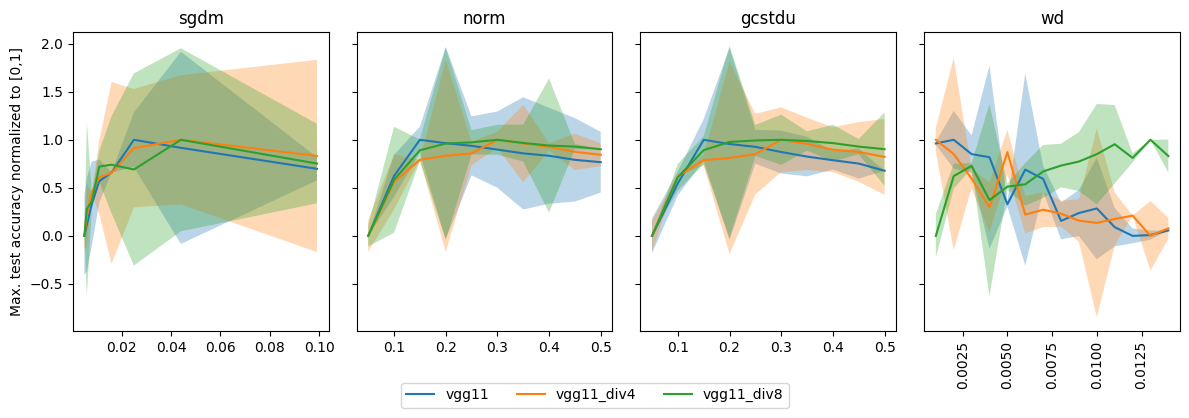

In [10]:

def _print_some_stats(s,x,y,y_normed,x_div4,y_div4,y_normed_div4,x_div8,y_div8,y_normed_div8):
    optimal_hp = x[y.argmax()]
    optimal_hp_div4 = x_div4[y_div4.argmax()]
    optimal_hp_div8 = x_div8[y_div8.argmax()]
    optimal_hp_maxacc = np.round(100*y[np.where(x == optimal_hp)][0],2)
    optimal_hp_div4_map_maxacc = np.round(100*y[np.where(x == optimal_hp_div4)][0],2)
    optimal_hp_div8_map_maxacc = np.round(100*y[np.where(x == optimal_hp_div8)][0],2)
    print("{0} optimal hps: vgg11: {1} | vgg11_div4: {2} | vgg11_div8: {3} with acc mappings: vgg11: {4}% | vgg11_div4: {5}% | vgg11_div8: {6}%".format(s,optimal_hp,optimal_hp_div4,optimal_hp_div8,optimal_hp_maxacc,optimal_hp_div4_map_maxacc,optimal_hp_div8_map_maxacc))
    print("{0} & {1} & {2} & {3} & {4}\\% & {5}\\% & {6} \\% \\\\".format(s,optimal_hp,optimal_hp_div4,optimal_hp_div8,optimal_hp_maxacc,optimal_hp_div4_map_maxacc,optimal_hp_div8_map_maxacc))


# Compare normal accuracy to accuracy over slim runs
fig,axs = plt.subplots(ncols=4,nrows=1,sharey="row")
fig.set_size_inches(12,4)
axs[0].set_ylabel("Max. test accuracy normalized to [0,1]")

x,y,y_normed = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/standard"),lambda subpath: float(subpath),lambda p : max_acc(get_stats(p,"test_stats")), axs[0], "standard")
x_div4,y_div4,y_normed_div4 = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/standard_div4"),lambda subpath: float(subpath),lambda p : max_acc(get_stats(p,"test_stats")), axs[0], "standard_div4")
x_div8,y_div8,y_normed_div8 = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/standard_div8"),lambda subpath: float(subpath),lambda p : max_acc(get_stats(p,"test_stats")), axs[0], "standard_div8")
_print_some_stats("standard",x,y,y_normed,x_div4,y_div4,y_normed_div4,x_div8,y_div8,y_normed_div8)

axs[0].set_title("sgdm")

x,y,y_normed = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/norm",skip=lambda s : s.endswith("0")),lambda subpath: float(subpath.split("_")[0]),
                                 lambda p : max_acc(get_stats(p,"test_stats")), axs[1], "norm")
x_div4,y_div4,y_normed_div4 = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/norm_div4"),lambda subpath: float(subpath.split("_")[0]),
                                           lambda p : max_acc(get_stats(p,"test_stats")), axs[1], "norm_div4")
x_div8,y_div8,y_normed_div8 = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/norm_div8"),lambda subpath: float(subpath.split("_")[0]),
                                           lambda p : max_acc(get_stats(p,"test_stats")), axs[1], "norm_div8")
_print_some_stats("norm",x,y,y_normed,x_div4,y_div4,y_normed_div4,x_div8,y_div8,y_normed_div8)

axs[1].set_title("norm")

x,y,y_normed = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/gcstdu/"),lambda subpath: float(subpath.split("_")[0]),
                                 lambda p : max_acc(get_stats(p,"test_stats")), axs[2], "gcstdu")
x_div4,y_div4,y_normed_div4 = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/gcstdu_div4/"),lambda subpath: float(subpath.split("_")[0]),
                                           lambda p : max_acc(get_stats(p,"test_stats")), axs[2], "gcstdu_div4")
x_div8,y_div8,y_normed_div8 = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/gcstdu_div8/"),lambda subpath: float(subpath.split("_")[0]),
                                           lambda p : max_acc(get_stats(p,"test_stats")), axs[2], "gcstdu_div8")
_print_some_stats("gcstdu",x,y,y_normed,x_div4,y_div4,y_normed_div4,x_div8,y_div8,y_normed_div8)

axs[2].set_title("gcstdu")

x,y,y_normed  = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/wd"),lambda subpath: float(subpath),lambda p : max_acc(get_stats(p,"test_stats")), axs[3], "wd")
x_div4,y_div4,y_normed_div4 = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/wd_div4"),lambda subpath: float(subpath),lambda p : max_acc(get_stats(p,"test_stats")), axs[3], "wd_div4")
x_div8,y_div8,y_normed_div8 = plot_hyperparam_y(get_subexpspaths("../exps_sgdm/wd_div8"),lambda subpath: float(subpath),lambda p : max_acc(get_stats(p,"test_stats")), axs[3], "wd_div8")
_print_some_stats("wd",x,y,y_normed,x_div4,y_div4,y_normed_div4,x_div8,y_div8,y_normed_div8)

axs[3].set_title("wd")
axs[3].tick_params(axis='x', labelrotation=90)

lines, _ = axs[0].get_legend_handles_labels()
labels = ["vgg11", "vgg11_div4", "vgg11_div8"]
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.05), bbox_transform=fig.transFigure)
fig.tight_layout()


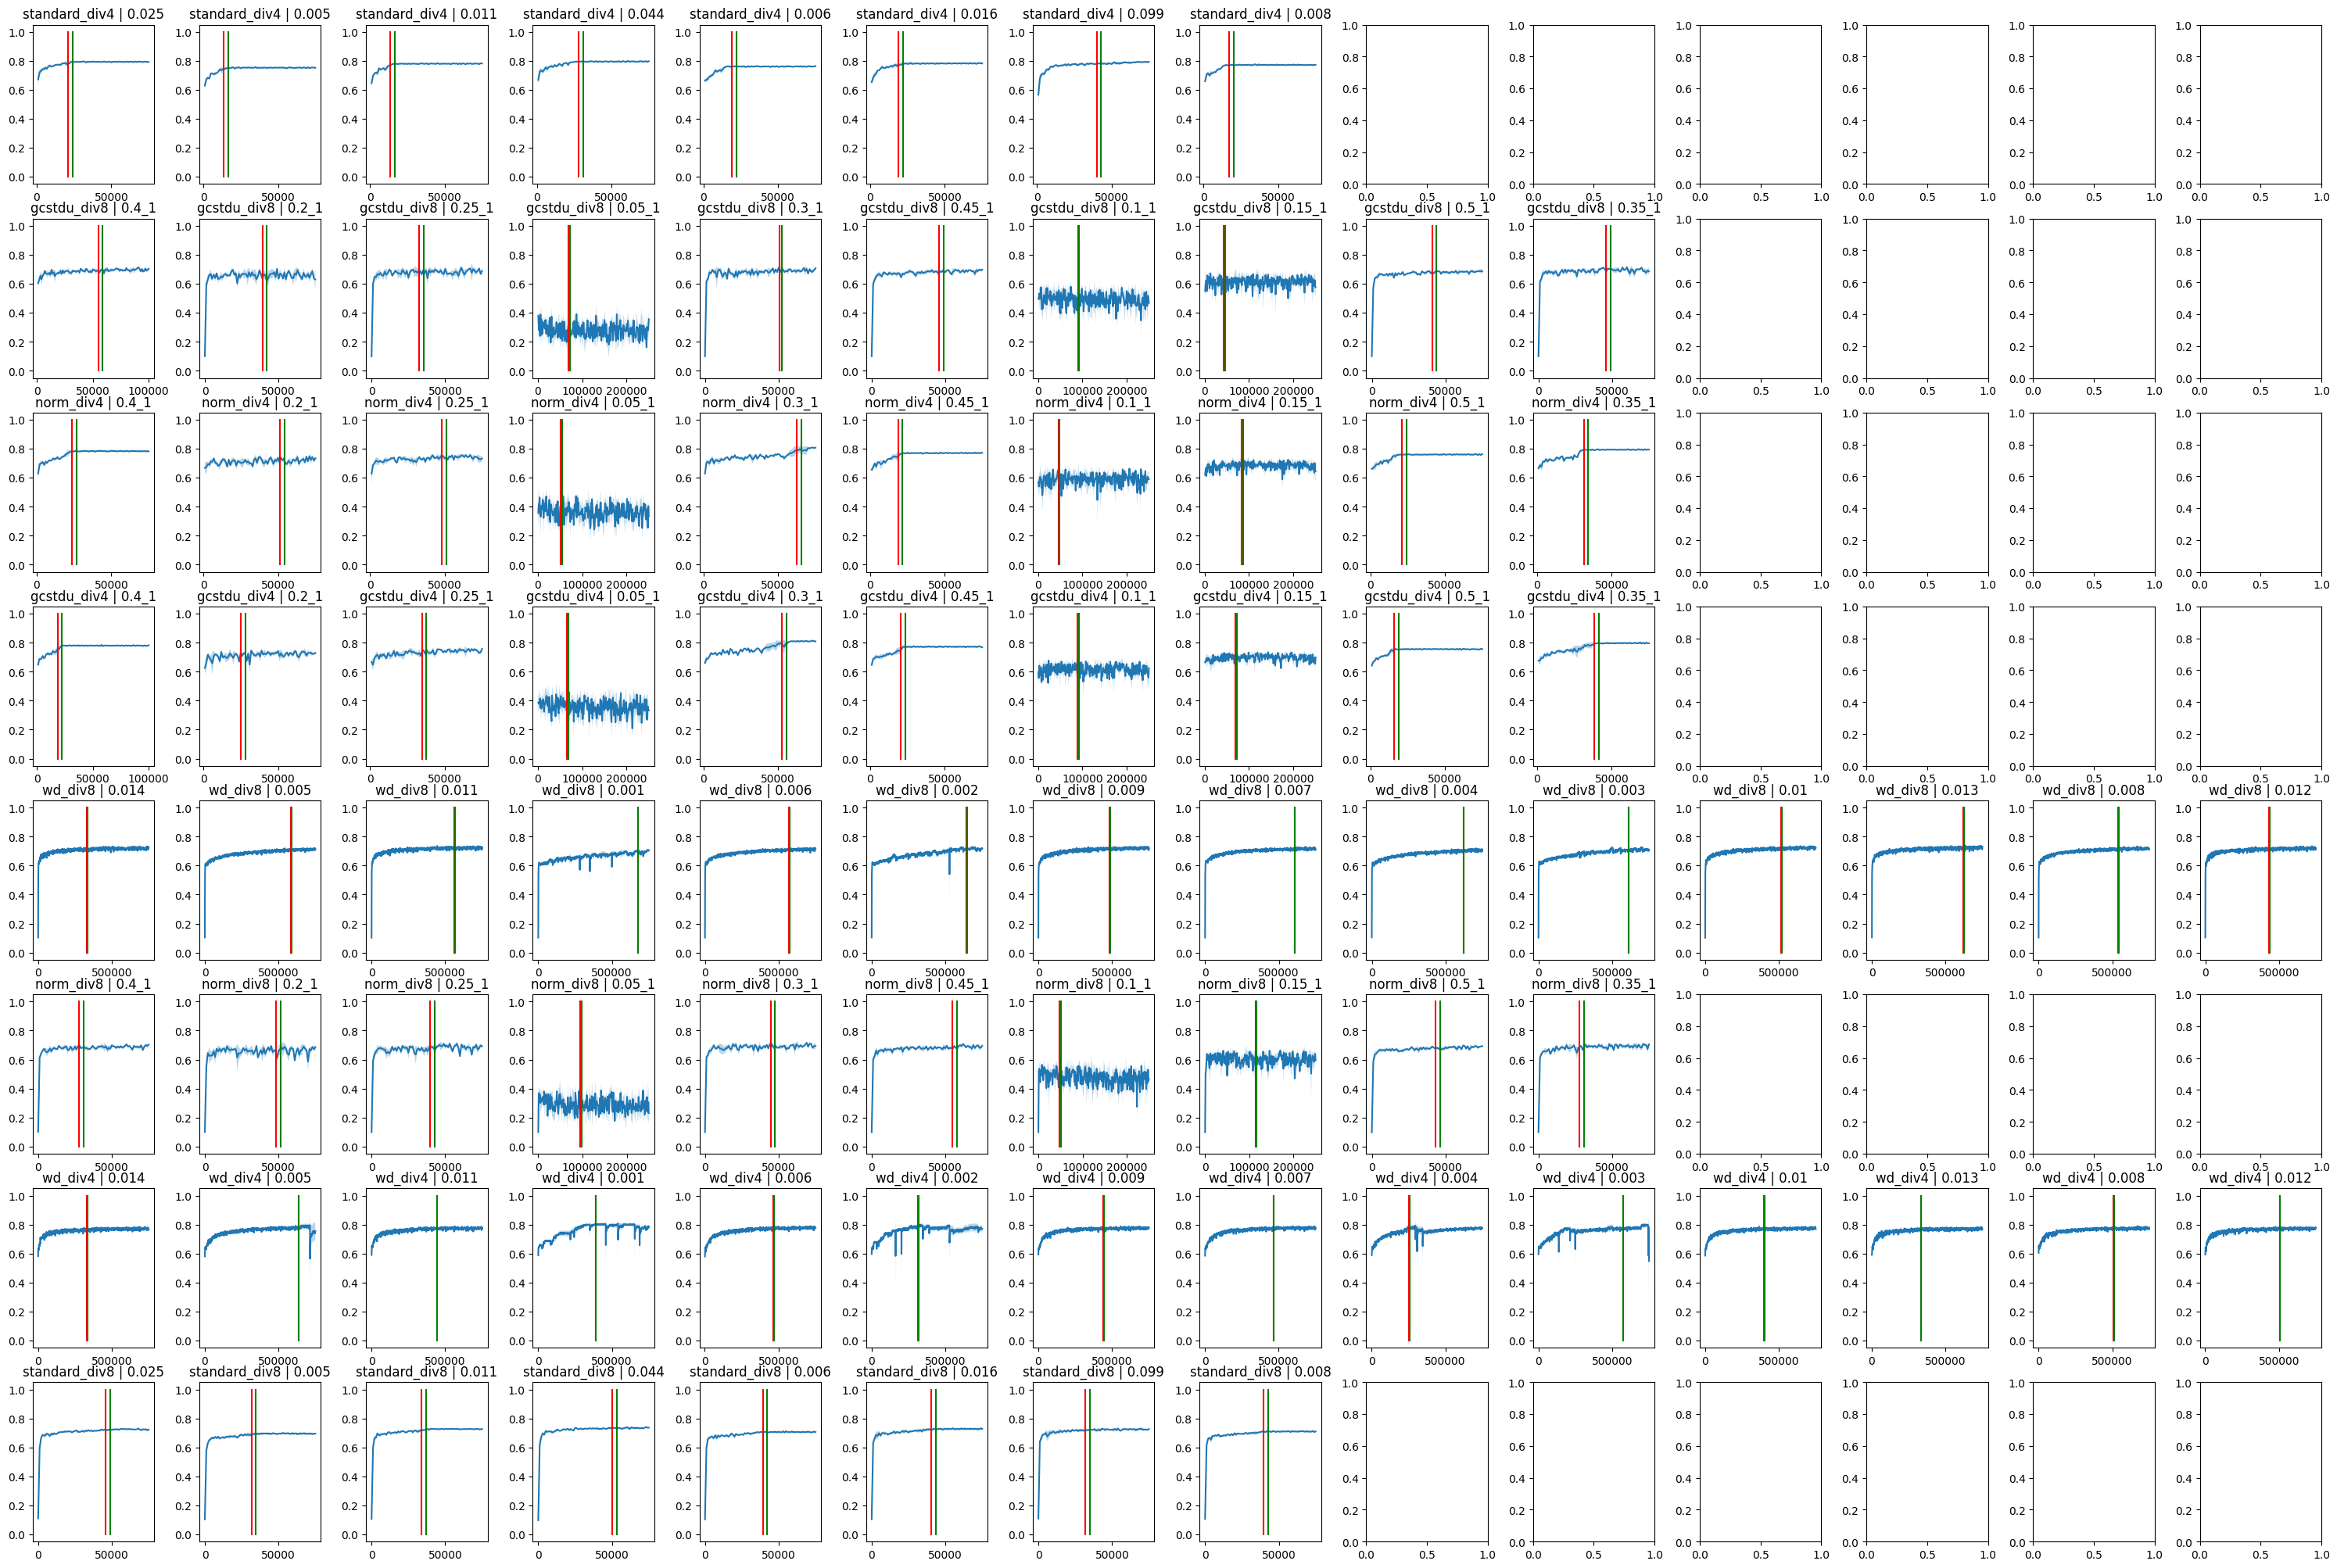

In [11]:


exps = {exp : list(get_subexpspaths(os.path.join("../exps_sgdm",exp))) for exp in os.listdir("../exps_sgdm") if "_div" in exp}
nrows = len(list(exps.keys()))
ncols = max([len(subexppaths) for subexppaths in exps.values()])

fig,axs = plt.subplots(ncols=ncols,nrows=nrows)
fig.set_size_inches(30,20)
fig.tight_layout()
for row,(exp,subexps) in zip(axs,exps.items()):
    for col,(path,subpath) in zip(row,subexps):
        test_acc = get_stats(path,"test_stats")["acc"]
        plot_step_stat(test_acc,col)

        convergence = np.mean(estimate_convergence(test_acc)[1])
        col.plot([convergence,convergence],[0,1],c="red")

        convergence = np.mean(estimate_convergence(test_acc)[0])
        col.plot([convergence,convergence],[0,1],c="green")
        col.set_title("{0} | {1}".format(exp,subpath))

In [12]:


def get_batchstats_mean(x, batch_stats):
    batch_stats = tree_map(lambda x : np.asarray(jnp.mean(x)),batch_stats)
    
    mean = {key : {"x" : x, "y" : value["mean"]} for key,value in batch_stats.items()}
    var = {key : {"x" : x, "y" : value["var"]} for key,value in batch_stats.items()}

    return mean,var

def get_weights_channel_norms(x, weights):
    weights = {key : value for key,value in weights.items() if "Conv" in key}
    cnorms = tree_map(lambda w : np.asarray(jnp.linalg.vector_norm(w.reshape(-1,w.shape[-1]),axis=0)),weights)
    mean_and_var_of_cnorms = tree_map(lambda x : (np.mean(x),np.var(x)),cnorms)

    cnorm_mean = {key : {"x" : x, "y" : value["kernel"][0]} for key,value in mean_and_var_of_cnorms.items()}
    cnorm_var = {key : {"x" : x, "y" : value["kernel"][1]} for key,value in mean_and_var_of_cnorms.items()}

    return cnorm_mean,cnorm_var

def get_weights_channel_means(x, weights):
    weights = {key : value for key,value in weights.items() if "Conv" in key}
    cmeans = tree_map(lambda w : np.asarray(jnp.mean(w.reshape(-1,w.shape[-1]),axis=0)),weights)
    mean_and_var_of_cmeans = tree_map(lambda x : (np.mean(x),np.var(x)),cmeans)

    cnorm_mean = {key : {"x" : x, "y" : value["kernel"][0]} for key,value in mean_and_var_of_cmeans.items()}
    cnorm_var = {key : {"x" : x, "y" : value["kernel"][1]} for key,value in mean_and_var_of_cmeans.items()}

    return cnorm_mean,cnorm_var

def get_weights_mean_std(x, weights):
    weights = {key : value for key,value in weights.items() if "Conv" in key}
    means_and_std = tree_map(lambda w : (np.asarray(jnp.mean(w)),np.asarray(jnp.std(w))),weights)

    means = {key : {"x" : x, "y" : value["kernel"][0]} for key,value in means_and_std.items()}
    std = {key : {"x" : x, "y" : value["kernel"][1]} for key,value in means_and_std.items()}

    return means,std

def get_grad_norm(x, grad):
    gradnorm = tree_map(lambda g : jnp.linalg.norm(g.reshape(-1)),grad)

    gradnorm_bn = np.mean(np.asarray(tree_leaves({key : value for key,value in gradnorm.items() if "BatchNorm" in key})))
    gradnorm_conv = np.mean(np.asarray(tree_leaves({key : value for key,value in gradnorm.items() if "Conv" in key})))
    gradnorm_dense = np.mean(np.asarray(tree_leaves({key : value for key,value in gradnorm.items() if "out" in key})))

    return {"bn" : {"x" : x, "y" : gradnorm_bn},"conv" : {"x" : x, "y" : gradnorm_conv},"dense" : {"x" : x, "y" : gradnorm_dense}}

def get_optim_momentum_norm(x, optim_state):
    optim_state = optim_state[1][0].trace
    momentum_norm = tree_map(lambda g : jnp.linalg.norm(g.reshape(-1)),optim_state)
    
    momentum_norm_bn = np.mean(np.asarray(tree_leaves({key : value for key,value in momentum_norm.items() if "BatchNorm" in key})))
    momentum_norm_conv = np.mean(np.asarray(tree_leaves({key : value for key,value in momentum_norm.items() if "Conv" in key})))
    momentum_norm_dense = np.mean(np.asarray(tree_leaves({key : value for key,value in momentum_norm.items() if "out" in key})))

    return {"bn" : {"x" : x, "y" : momentum_norm_bn},"conv" : {"x" : x, "y" : momentum_norm_conv},"dense" : {"x" : x, "y" : momentum_norm_dense}}


def plot_data(path, map_fn):
    # Format of dicts in list:
    # rows
    #   cols
    #       title
    #       label
    #            x
    #            y
    row_dict = []

    ckpt_paths_states = get_ckpt_paths(path,"states")
    ckpt_paths_grads = get_ckpt_paths(path,"grads")

    def compute(i,ckpt_states,_,ckpt_grads):

        if not i%5000 == 0:
            return
        
        weights,batch_stats,optim_state = load([ckpt_states])
        grad = load([ckpt_grads])

        batchstats_mean_of_mean,batchstats_var_of_mean = get_batchstats_mean(i, batch_stats)
        cnorm_mean,cnorm_var = get_weights_channel_norms(i,weights)
        cmean_mean,cmean_var = get_weights_channel_means(i,weights)
        mean,std = get_weights_mean_std(i,weights)
        gradnorm = get_grad_norm(i, grad)
        momentumnorm = get_optim_momentum_norm(i,optim_state)
        return map_fn({"batchstats_mean_of_mean" : batchstats_mean_of_mean, "batchstats_var_of_mean" : batchstats_var_of_mean,
                       "cnorm_mean" : cnorm_mean,"cnorm_var" : cnorm_var,
                       "cmean_mean" : cmean_mean,"cmean_var" : cmean_var,
                       "mean" : mean,"std" : std,
                       "gradnorm" : gradnorm,"momentumnorm" : momentumnorm})
      

        """
        1 : 
            {
            0 :  
                ("Cnorms Mean", cnorm_mean) , 
            1 :  
                ("Cnorms Var", cnorm_var) 
            }, 
        2 :
            {
            0 :
                ("Grad Norm", gradnorm),
            1 :
                ("Momentuum Norm", momentumnorm) 
            }
        """
    
 
    with ThreadPool(processes=12) as pool:
        row_dict = pool.map(lambda x : compute(*list(chain(*x))),zip(list(ckpt_paths_states.items()),list(ckpt_paths_grads.items())))
        

    row_dict = [e for e in row_dict if e is not None]
    row_dict = tree_map(lambda *x : x[0] if isinstance(x[0],str) else np.asarray(x) , *row_dict)

    ncols = len(list(row_dict[0].keys()))
    nrows = len(list(row_dict.keys()))
    fig,axs = plt.subplots(ncols = ncols, nrows = nrows)
    for row,col_dict in row_dict.items():
        for col, (title, label_dict) in col_dict.items():
            if ncols == 1 and nrows == 1:
                ax = plt
            elif ncols == 1:
                ax = axs[row]
            elif nrows == 1:
                ax = axs[col] 
            else:
                ax = axs[row][col]
            for label,x_y_dict in label_dict.items():
                ax.plot(x_y_dict["x"],x_y_dict["y"],label=label)
            
            ax.set_title(title)
            #ax.legend()

    return (fig,axs)





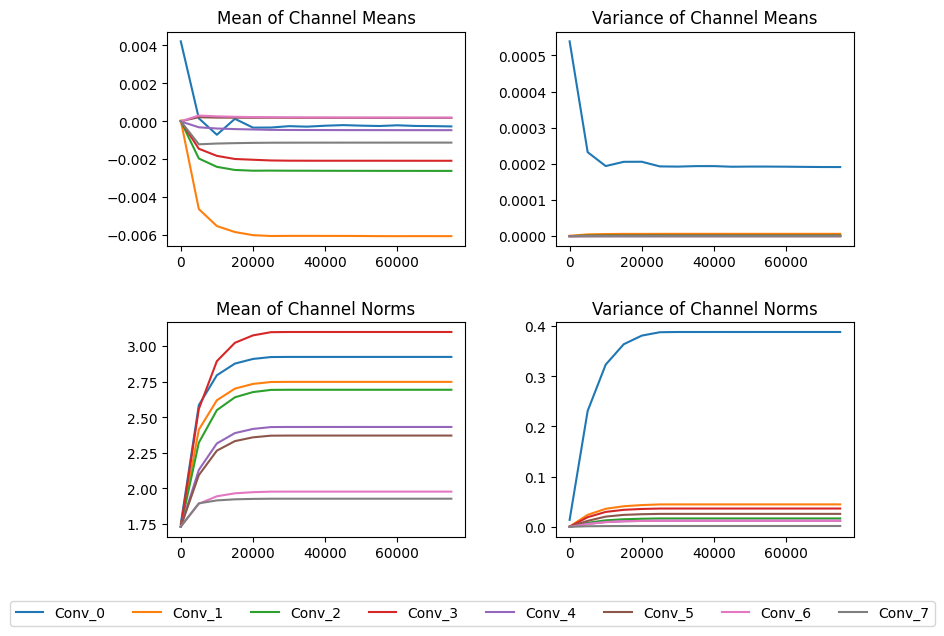

In [13]:
fig,axs = plot_data("../exps_sgdm/standard/0.025", lambda d :     
                    {0 :    {
                            0 :  
                                ("Mean of Channel Means", d["cmean_mean"]) , 
                            1 :  
                                ("Variance of Channel Means", d["cmean_var"]) 
                            },
                    1 :    {
                            0 :  
                                ("Mean of Channel Norms", d["cnorm_mean"]) , 
                            1 :  
                                ("Variance of Channel Norms", d["cnorm_var"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,6)
lines, labels = axs[0][0].get_legend_handles_labels()
#labels = ["vgg11", "vgg11_div8"]
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig("../images/sgdm/noreg_0.025_cmeans_cnorms.png", bbox_inches='tight')

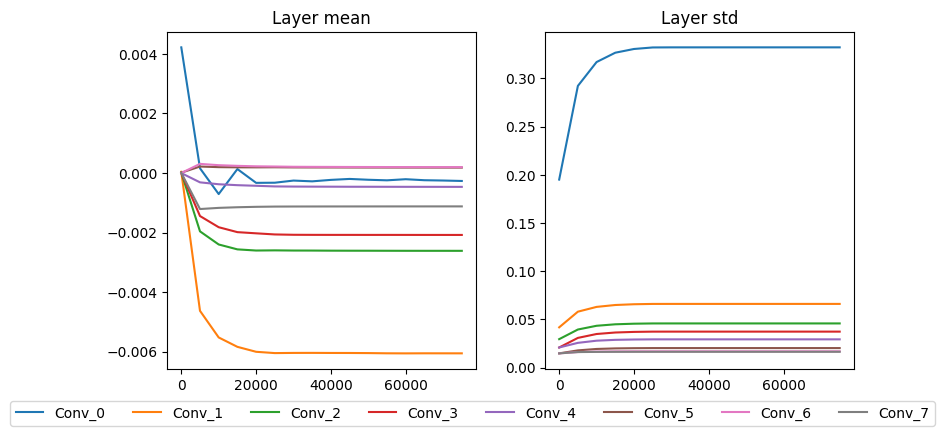

In [14]:
fig,axs = plot_data("../exps_sgdm/standard/0.025", lambda d :     
                    {0 :    {
                            0 :  
                                ("Layer mean", d["mean"]) , 
                            1 :  
                                ("Layer std", d["std"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,4)
lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig("../images/sgdm/noreg_0.025_lmean_lstd.png", bbox_inches='tight')

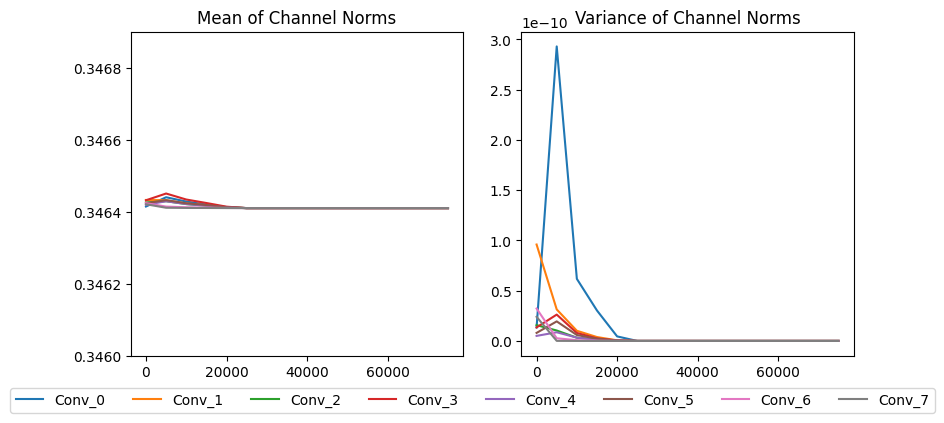

In [15]:
fig,axs = plot_data("../exps_sgdm/norm/0.2_1", lambda d :     
                    {0 :    {
                            0 :  
                                ("Mean of Channel Norms", d["cnorm_mean"]) , 
                            1 :  
                                ("Variance of Channel Norms", d["cnorm_var"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,4)
lines, labels = axs[0].get_legend_handles_labels()
axs[0].set_ylim(0.346,0.3469)
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig("../images/sgdm/norm_0.2_1_cnorms.png", bbox_inches='tight')

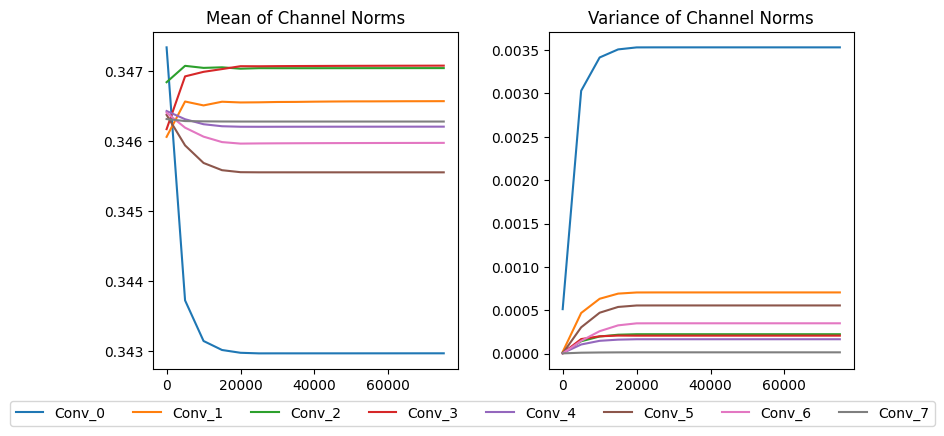

In [16]:
fig,axs = plot_data("../exps_sgdm/gcstdu/0.2_1", lambda d :     
                    {0 :    {
                            0 :  
                                ("Mean of Channel Norms", d["cnorm_mean"]) , 
                            1 :  
                                ("Variance of Channel Norms", d["cnorm_var"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,4)
lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig("../images/sgdm/gcstdu_0.2_1_cnorms.png", bbox_inches='tight')

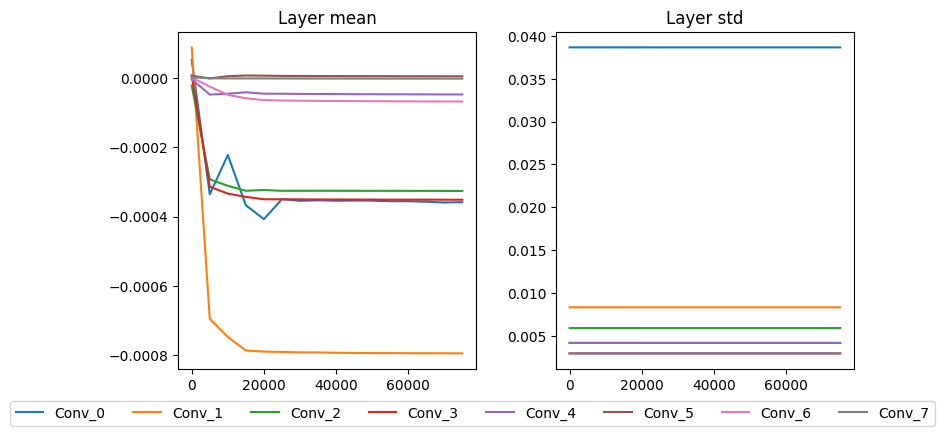

In [17]:
fig,axs = plot_data("../exps_sgdm/gcstdu/0.2_1", lambda d :     
                    {0 :    {
                            0 :  
                                ("Layer mean", d["mean"]) , 
                            1 :  
                                ("Layer std", d["std"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,4)
lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig("../images/sgdm/gcstdu_0.2_1_lmean_lstd.png", bbox_inches='tight')